In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import pandas as pd

In [12]:
bird = pd.read_csv("bird_data_counts.csv")
bird.head()

,geohash,day_of_week,weekend,low_battery,day,hour,minute,n
0,9q59x6xh,6,1,0,15,21,35,6
1,9q59x6xh,6,1,0,15,21,40,6
2,9q59x6xh,6,1,0,15,21,45,6
3,9q59x6xh,6,1,0,15,21,50,6
4,9q59x6xh,6,1,0,15,21,55,6


In [17]:
#split dataset in features and target variable
feature_cols = [ 'day_of_week', 'weekend', 'day','hour','minute','n'] # remove 'geohash'
X = bird[feature_cols] # Features
y = bird.low_battery # Target variable

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [19]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
#
y_pred=logreg.predict(X_test)

//anaconda/envs/bird_view/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  20, 1905],
       [   5, 7650]])

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

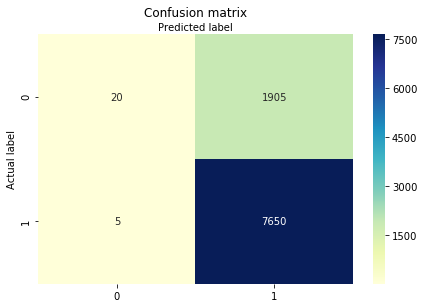

In [23]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8006263048016702
Precision: 0.8006279434850864
Recall: 0.999346832135859


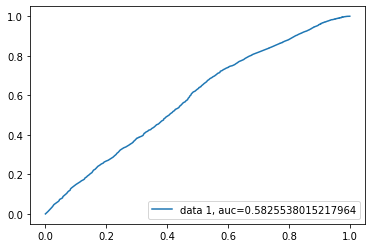

In [25]:
# ROC curve 
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()